In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop



#Load data into pandas dataframe
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0], 1)
X = df[df.columns[:-1]].copy()
y = df[df.columns[-1]].copy()

#Replace binary flags with 0 and 1
X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M' : 0, 'F' : 1})
X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y' : 0, 'N' : 1})
X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y' : 0, 'N' : 1})

#One-hot encode categorical variables
income_onehot = pd.get_dummies(X['NAME_INCOME_TYPE'], prefix='Income')
education_onehot = pd.get_dummies(X['NAME_EDUCATION_TYPE'], prefix='Education')
family_onehot = pd.get_dummies(X['NAME_FAMILY_STATUS'], prefix='Family')
housing_onehot = pd.get_dummies(X['NAME_HOUSING_TYPE'], prefix='Housing')
occasion_onehot = pd.get_dummies(X['OCCUPATION_TYPE'], prefix='Occupation')

X = X.join(income_onehot)
X = X.join(education_onehot)
X = X.join(family_onehot)
X = X.join(housing_onehot)
X = X.join(occasion_onehot)

#Drop original categorical variables
X = X.drop('NAME_INCOME_TYPE', 1)
X = X.drop('NAME_EDUCATION_TYPE', 1)
X = X.drop('NAME_FAMILY_STATUS', 1)
X = X.drop('NAME_HOUSING_TYPE', 1)
X = X.drop('OCCUPATION_TYPE', 1)

X = X.astype('float64')

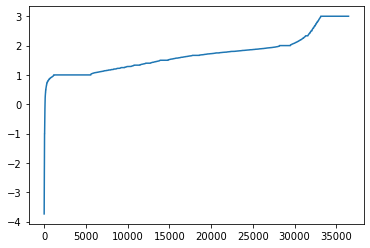

In [36]:
y_sorted = y.sort_values().reset_index(drop=True)
y_sorted.plot.line()

In [37]:
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.30)
model = Sequential()

#Hidden Layer 1
model.add(Dense(32, input_dim=X_train.shape[1], activation= 'relu'))
model.add(Dropout(0.3))

#Hidden Layer 2
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(1))

model.compile(loss="mse", optimizer = 'rmsprop', metrics=['mean_squared_error'])
metrics = model.fit(X_train, y_train,
                    batch_size=750,
                    epochs=300,
                    validation_data=(X_test, y_test))

#Retest on the test data for metrics
y_pred = model.predict_classes(X, verbose = 0).reshape(1, -1)[0]

Train on 25519 samples, validate on 10938 samples
Epoch 1/300
25519/25519 [==============================] - 0s 15us/sample - loss: 1164205.7728 - mean_squared_error: 1164206.8750 - val_loss: 1.5533 - val_mean_squared_error: 1.5533
Epoch 2/300
25519/25519 [==============================] - 0s 4us/sample - loss: 1.3956 - mean_squared_error: 1.3956 - val_loss: 1.1831 - val_mean_squared_error: 1.1831
Epoch 3/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.8618 - mean_squared_error: 0.8618 - val_loss: 0.5043 - val_mean_squared_error: 0.5043
Epoch 4/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.5326 - mean_squared_error: 0.5326 - val_loss: 0.4862 - val_mean_squared_error: 0.4862
Epoch 5/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4685 - mean_squared_error: 0.4685 - val_loss: 0.5538 - val_mean_squared_error: 0.5538
Epoch 6/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4419 - me

Epoch 49/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4406 - mean_squared_error: 0.4406 - val_loss: 0.4451 - val_mean_squared_error: 0.4451
Epoch 50/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4381 - mean_squared_error: 0.4381 - val_loss: 0.5649 - val_mean_squared_error: 0.5649
Epoch 51/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4417 - mean_squared_error: 0.4417 - val_loss: 0.5016 - val_mean_squared_error: 0.5016
Epoch 52/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4362 - mean_squared_error: 0.4362 - val_loss: 0.4097 - val_mean_squared_error: 0.4097
Epoch 53/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4298 - mean_squared_error: 0.4298 - val_loss: 0.3861 - val_mean_squared_error: 0.3861
Epoch 54/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4317 - mean_squared_error: 0.4317 - val_loss: 0.3855 - val_mean_sq

25519/25519 [==============================] - 0s 4us/sample - loss: 0.4354 - mean_squared_error: 0.4354 - val_loss: 0.3951 - val_mean_squared_error: 0.3951
Epoch 98/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4333 - mean_squared_error: 0.4333 - val_loss: 0.7071 - val_mean_squared_error: 0.7071
Epoch 99/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4410 - mean_squared_error: 0.4410 - val_loss: 0.4092 - val_mean_squared_error: 0.4092
Epoch 100/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4309 - mean_squared_error: 0.4309 - val_loss: 0.7383 - val_mean_squared_error: 0.7383
Epoch 101/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4467 - mean_squared_error: 0.4467 - val_loss: 0.3974 - val_mean_squared_error: 0.3974
Epoch 102/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4311 - mean_squared_error: 0.4311 - val_loss: 0.4483 - val_mean_squared_erro

25519/25519 [==============================] - 0s 4us/sample - loss: 0.4430 - mean_squared_error: 0.4430 - val_loss: 0.4457 - val_mean_squared_error: 0.4457
Epoch 146/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4338 - mean_squared_error: 0.4338 - val_loss: 0.8087 - val_mean_squared_error: 0.8087
Epoch 147/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4441 - mean_squared_error: 0.4441 - val_loss: 0.5853 - val_mean_squared_error: 0.5853
Epoch 148/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4337 - mean_squared_error: 0.4337 - val_loss: 0.5388 - val_mean_squared_error: 0.5388
Epoch 149/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4326 - mean_squared_error: 0.4326 - val_loss: 0.3857 - val_mean_squared_error: 0.3857
Epoch 150/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4373 - mean_squared_error: 0.4373 - val_loss: 0.5124 - val_mean_squared_er

Epoch 193/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4294 - mean_squared_error: 0.4294 - val_loss: 0.7288 - val_mean_squared_error: 0.7288
Epoch 194/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4374 - mean_squared_error: 0.4374 - val_loss: 0.7306 - val_mean_squared_error: 0.7306
Epoch 195/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4267 - mean_squared_error: 0.4267 - val_loss: 0.6559 - val_mean_squared_error: 0.6559
Epoch 196/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4361 - mean_squared_error: 0.4361 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 197/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4360 - mean_squared_error: 0.4360 - val_loss: 0.7607 - val_mean_squared_error: 0.7607
Epoch 198/300
25519/25519 [==============================] - 0s 4us/sample - loss: 0.4400 - mean_squared_error: 0.4400 - val_loss: 0.4807 - val_m

KeyboardInterrupt: 

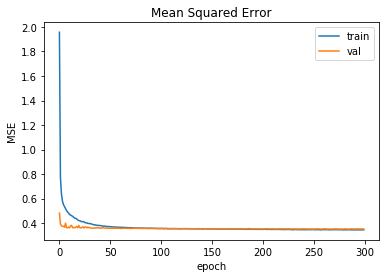

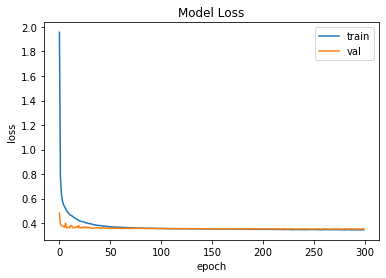

In [33]:
#Model Accuracy Plot
plt.subplot(1, 1, 1)
plt.plot(metrics.history['mean_squared_error'])
plt.plot(metrics.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#Model Loss Plot
plt.subplot(1, 1, 1)
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [34]:
print(np.unique(y_pred))

[1]
